In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/dalima04.csv")
df.head()

,SrNo,Customer_ID,Customer_Name,Year,Date,SLS_Amount
0,1,RPD000000011549,Ms. Ankita Agarwal,2025,11-03-2025,1890.0
1,2,RPD000000011549,Ms. Ankita Agarwal,2025,11-03-2025,350.0
2,3,RPD000000011548,Ms. Lalita Devi,2025,10-03-2025,346.0
3,4,RPD000000011547,Ms. Shailja Rajpal,2025,08-03-2025,1590.0
4,5,RPD000000011546,Mr. Shubham Goyal,2025,08-03-2025,1400.0


In [ ]:
df["visit time"]=pd.to_datetime(df["visit time"], format="%d-%m-%Y")

In [ ]:
df.rename(columns={"Date":"visit time"},inplace=True)
df.head()

,SrNo,Customer_ID,Customer_Name,Year,visit time,SLS_Amount
0,1,RPD000000011549,Ms. Ankita Agarwal,2025,2025-03-11,1890.0
1,2,RPD000000011549,Ms. Ankita Agarwal,2025,2025-03-11,350.0
2,3,RPD000000011548,Ms. Lalita Devi,2025,2025-03-10,346.0
3,4,RPD000000011547,Ms. Shailja Rajpal,2025,2025-03-08,1590.0
4,5,RPD000000011546,Mr. Shubham Goyal,2025,2025-03-08,1400.0


In [ ]:
df["date"]=df["visit time"].dt.date


In [ ]:
df[["date","visit time"]].head()

,date,visit time
0,2025-03-11,2025-03-11
1,2025-03-11,2025-03-11
2,2025-03-10,2025-03-10
3,2025-03-08,2025-03-08
4,2025-03-08,2025-03-08


In [ ]:
# Group by date to count total daily visits
daily_visits = df.groupby('date').size().reset_index(name='visits')

# Rename columns to match Prophet's expected format: 'ds' and 'y'
daily_visits.columns = ['ds', 'y']

# Final preview
daily_visits.tail()


,ds,y
0,2017-09-21,1
1,2017-09-28,1
2,2017-10-02,1
3,2017-10-09,1
4,2017-10-23,1


In [ ]:
daily_visits.tail()

,ds,y
1877,2025-03-07,17
1878,2025-03-08,7
1879,2025-03-09,5
1880,2025-03-10,5
1881,2025-03-11,9


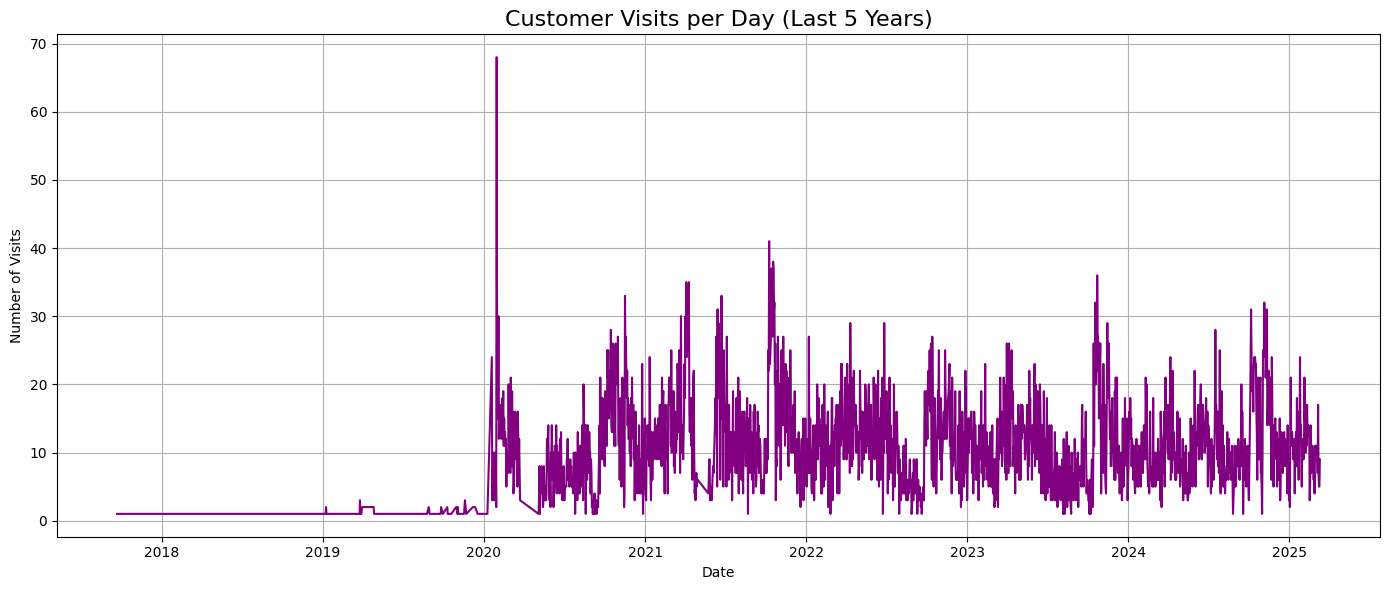

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(daily_visits['ds'], daily_visits['y'], color='purple')
plt.title("Customer Visits per Day (Last 5 Years)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.grid(True)
plt.tight_layout()
plt.show()



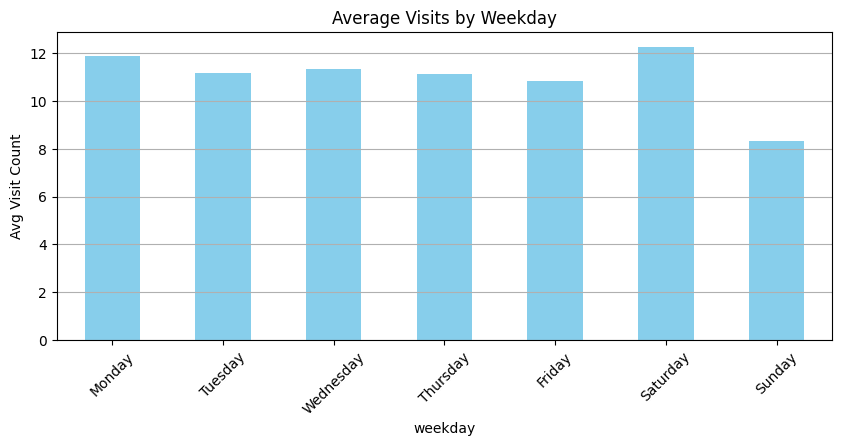

In [ ]:
# Convert 'ds' to datetime if needed
daily_visits['ds'] = pd.to_datetime(daily_visits['ds'])

# Add weekday name
daily_visits['weekday'] = daily_visits['ds'].dt.day_name()

# Average visits per weekday
weekday_avg = daily_visits.groupby('weekday')['y'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

weekday_avg.plot(kind='bar', color='skyblue', figsize=(10,4))
plt.title("Average Visits by Weekday")
plt.ylabel("Avg Visit Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


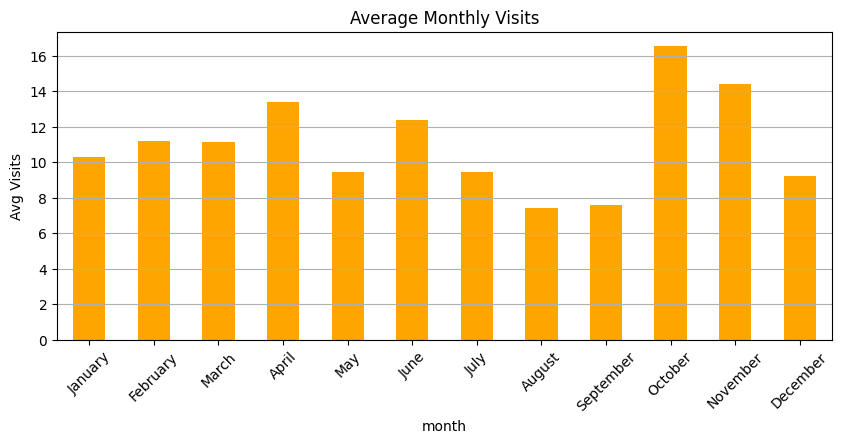

In [ ]:
# Add year and month
daily_visits['year'] = daily_visits['ds'].dt.year
daily_visits['month'] = daily_visits['ds'].dt.month_name()

# Average monthly visits
monthly_avg = daily_visits.groupby('month')['y'].mean()

monthly_avg = monthly_avg.reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

monthly_avg.plot(kind='bar', color='orange', figsize=(10,4))
plt.title("Average Monthly Visits")
plt.ylabel("Avg Visits")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


In [ ]:
daily_visits.head()

,ds,y,weekday,year,month
0,2017-09-21,1,Thursday,2017,September
1,2017-09-28,1,Thursday,2017,September
2,2017-10-02,1,Monday,2017,October
3,2017-10-09,1,Monday,2017,October
4,2017-10-23,1,Monday,2017,October


In [ ]:
# Save cleaned version for Day 3
daily_visits[['ds', 'y']].to_csv("daily_visits_cleaned.csv", index=False)


In [ ]:
pip install Prophet

In [ ]:
df=pd.read_csv("daily_visits_cleaned.csv", parse_dates=["ds"])

In [ ]:
from prophet import Prophet

# Create and fit model
model = Prophet()
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t5eesym/txzln0j2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t5eesym/6k71at4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76354', 'data', 'file=/tmp/tmp3t5eesym/txzln0j2.json', 'init=/tmp/tmp3t5eesym/6k71at4e.json', 'output', 'file=/tmp/tmp3t5eesym/prophet_modelk1c0eyxs/prophet_model-20250616095802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=180)
future.head()


,ds
0,2017-09-21
1,2017-09-28
2,2017-10-02
3,2017-10-09
4,2017-10-23


In [ ]:
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
2052,2025-08-29,8.040539,1.340736,14.307090
2053,2025-08-30,9.538571,2.954695,16.709971
2054,2025-08-31,5.373410,-1.691874,12.046310
2055,2025-09-01,9.300804,2.188123,16.306875
2056,2025-09-02,8.374792,1.764380,15.246434
2057,2025-09-03,8.553906,1.610553,16.259408
2058,2025-09-04,8.407799,1.535107,15.526936
2059,2025-09-05,7.962405,1.227319,14.832231
2060,2025-09-06,9.350449,2.710932,16.517249
2061,2025-09-07,5.075635,-2.110339,12.444342


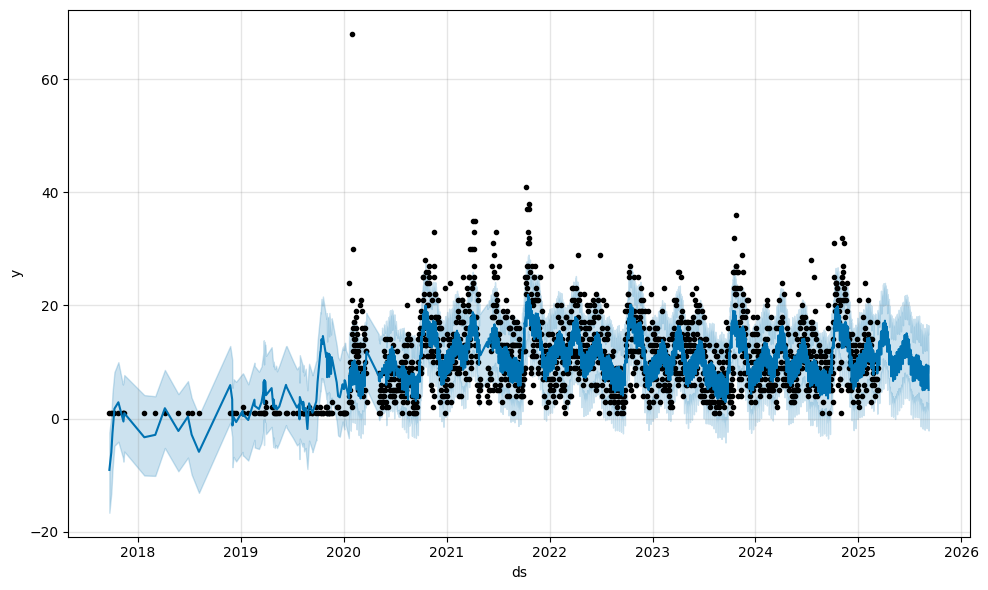

In [ ]:
fig1 = model.plot(forecast)


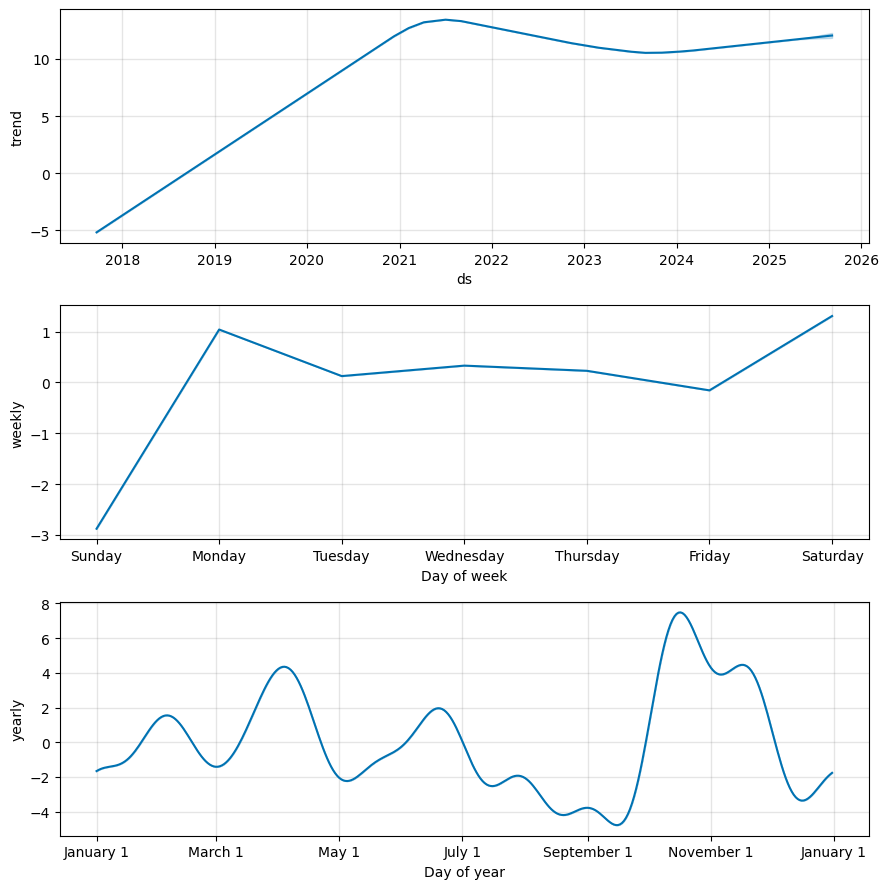

In [ ]:
fig2 = model.plot_components(forecast)
